In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import linear_model
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as mlt

In [3]:
df= pd.read_csv('Cancer_dm.csv')

In [4]:
df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.50,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60,0.852,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.618,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20,0.318,Negative


In [6]:
df.shape

(1817, 45)

In [7]:
df.isna().sum().sum()

880

In [8]:
df = df[df.iloc[:,2] != 'Normal']

In [9]:
df.isna().sum().sum()

1

In [10]:
df.columns

Index(['Patient ID #', 'Sample ID #', 'Tumor type', 'AJCC Stage',
       'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)',
       'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)',
       'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)',
       'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)',
       'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)',
       'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)',
       'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)',
       'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)',
       'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)',
       'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)',
       'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)',
       'TIMP-2 (pg/ml)', 'CancerSEEK Logistic Regression Score',
       'CancerSEEK Test Result'],
      dtype='object')

In [12]:
df.rename(columns = {'AFP (pg/ml)':'AFP_(pg/ml)', 'CA-125 (U/ml)':'CA-125_(U/ml)',
                              'CA 15-3 (U/ml)':'CA_15-3_(U/ml)','CA19-9 (U/ml)':'CA19-9_(U/ml)',
                              'CEA (pg/ml)':'CEA_(pg/ml)','HGF (pg/ml)':'HGF_(pg/ml)',
                             'OPN (pg/ml)':'OPN_(pg/ml)','Prolactin (pg/ml)':'Prolactin_(pg/ml)','TIMP-1 (pg/ml)':'TIMP-1_(pg/ml)',
                     'Tumor type':'Tumor_type','Patient ID #':'Patient_ID','Sample ID #':'Sample_ID',
                     'CancerSEEK Logistic Regression Score':'CancerSEEK_Logistic_Regression_Score',
                     'CancerSEEK Test Result':'CancerSEEK_Test_Result','AJCC Stage':'AJCC_Stage'}, inplace = True)

C:\Users\sriku\AppData\Local\Temp/ipykernel_17296/2313466340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'AFP (pg/ml)':'AFP_(pg/ml)', 'CA-125 (U/ml)':'CA-125_(U/ml)',


In [13]:
df.isna().sum().sum()

1

In [14]:
df1 = df[["Tumor_type","AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)","CancerSEEK_Test_Result"]]

In [15]:
df1.head()

,Tumor_type,AFP_(pg/ml),CA-125_(U/ml),CA_15-3_(U/ml),CA19-9_(U/ml),CEA_(pg/ml),HGF_(pg/ml),OPN_(pg/ml),Prolactin_(pg/ml),TIMP-1_(pg/ml),CancerSEEK_Test_Result
0,Colorectum,1583.45,5.09,19.08,*16.452,540.1,377.26,56516.58,11606.6,56428.71,Positive
1,Colorectum,*715.308,7.27,10.04,40.91,"5,902.4",659.68,61001.39,14374.99,73940.49,Positive
2,Colorectum,4365.53,*4.854,16.96,*16.452,973.8,329.07,88896.24,38375,22797.28,Negative
3,Colorectum,*715.308,5.39,8.31,*16.452,"2,027.5",266.66,42549.61,12072.51,20441.19,Negative
4,Colorectum,801.3,*4.854,11.73,*16.452,614.5,370.88,24274.11,23718.17,56288.51,Negative


In [16]:
df1.isna().sum().sum()

0

In [17]:
df1['AFP_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["AFP_(pg/ml)"]]
df1['CA-125_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA-125_(U/ml)"]]
df1['CA_15-3_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA_15-3_(U/ml)"]]
df1['CA19-9_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA19-9_(U/ml)"]]
df1['CEA_(pg/ml)']=[re.sub("[*,]", "", x).strip() for x in df1["CEA_(pg/ml)"]]
df1['HGF_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["HGF_(pg/ml)"]]
df1['OPN_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["OPN_(pg/ml)"]]
df1['Prolactin_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["Prolactin_(pg/ml)"]]
df1['TIMP-1_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["TIMP-1_(pg/ml)"]]

C:\Users\sriku\AppData\Local\Temp/ipykernel_17296/774541352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AFP_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["AFP_(pg/ml)"]]
C:\Users\sriku\AppData\Local\Temp/ipykernel_17296/774541352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CA-125_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA-125_(U/ml)"]]
C:\Users\sriku\AppData\Local\Temp/ipykernel_17296/774541352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [18]:
df1

,Tumor_type,AFP_(pg/ml),CA-125_(U/ml),CA_15-3_(U/ml),CA19-9_(U/ml),CEA_(pg/ml),HGF_(pg/ml),OPN_(pg/ml),Prolactin_(pg/ml),TIMP-1_(pg/ml),CancerSEEK_Test_Result
0,Colorectum,1583.45,5.09,19.08,16.452,540.1,377.26,56516.58,11606.6,56428.71,Positive
1,Colorectum,715.308,7.27,10.04,40.91,5902.4,659.68,61001.39,14374.99,73940.49,Positive
2,Colorectum,4365.53,4.854,16.96,16.452,973.8,329.07,88896.24,38375,22797.28,Negative
3,Colorectum,715.308,5.39,8.31,16.452,2027.5,266.66,42549.61,12072.51,20441.19,Negative
4,Colorectum,801.3,4.854,11.73,16.452,614.5,370.88,24274.11,23718.17,56288.51,Negative
...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,879.498,24.82,10.30,42.39,914.00,284.34,38603.84,58266.97,167799.61,Positive
1813,Ovary,1337.33,5.58,9.80,16.44,1179.5,374.03,29994.01,187828.79,123443.76,Positive
1814,Ovary,879.498,30.48,8.48,16.44,443.01,309.22,93601.15,241440.02,104070.89,Positive
1815,Ovary,879.498,1469.45,23.74,62.26,443.01,1153.7,145116.62,140145.7,110579.24,Positive


In [19]:
df1.dtypes

Tumor_type                object
AFP_(pg/ml)               object
CA-125_(U/ml)             object
CA_15-3_(U/ml)            object
CA19-9_(U/ml)             object
CEA_(pg/ml)               object
HGF_(pg/ml)               object
OPN_(pg/ml)               object
Prolactin_(pg/ml)         object
TIMP-1_(pg/ml)            object
CancerSEEK_Test_Result    object
dtype: object

In [20]:
df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]]=df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]].astype(float)

C:\Users\sriku\AppData\Local\Temp/ipykernel_17296/1635725234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]]=df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]].astype(float)


In [21]:
df1.dtypes

Tumor_type                 object
AFP_(pg/ml)               float64
CA-125_(U/ml)             float64
CA_15-3_(U/ml)            float64
CA19-9_(U/ml)             float64
CEA_(pg/ml)               float64
HGF_(pg/ml)               float64
OPN_(pg/ml)               float64
Prolactin_(pg/ml)         float64
TIMP-1_(pg/ml)            float64
CancerSEEK_Test_Result     object
dtype: object

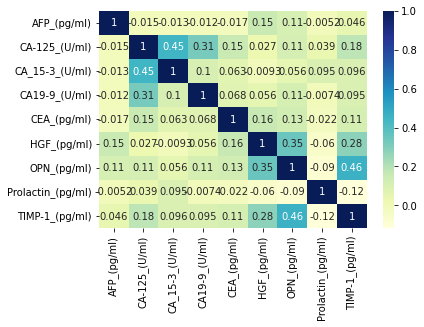

In [22]:
df1.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mlt.show()

In [23]:
df2=df1[df1['AFP_(pg/ml)'] >= 21321]
df2.shape

(31, 11)

In [24]:
df3=df1[df1['CA-125_(U/ml)'] >= 577]
df3.shape

(12, 11)

In [25]:
df5=df1[df1['CA19-9_(U/ml)'] >= 92]
df5.shape

(94, 11)

In [26]:
df6=df1[df1['CEA_(pg/ml)'] >= 7507]
df6.shape

(98, 11)

In [27]:
df1['Tumor_type'].value_counts()

Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: Tumor_type, dtype: int64

# AFP

In [28]:
x3= df2.iloc[:,1].values  
y3= df2.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("afp.png")

a = dict(Counter(y3_pred))
print(a)

0.6
{'Stomach': 3, 'Liver': 7}


In [29]:
x3= df2.iloc[:,1].values  
y3= df2.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.7
{'Liver': 9, 'Stomach': 1}


# ca-125

In [40]:
x3= df3.iloc[:,2].values  
y3= df3.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("ca-125.png")

a = dict(Counter(y3_pred))
print(a)

0.75
{'Ovary': 3, 'Liver': 1}


# ca19-9

In [31]:
x3= df5.iloc[:,4].values  
y3= df5.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("ca19-9.png")

a = dict(Counter(y3_pred))
print(a)

0.3103448275862069
{'Liver': 1, 'Pancreas': 11, 'Colorectum': 8, 'Stomach': 4, 'Breast': 3, 'Lung': 1, 'Esophagus': 1}


# Pancrease

In [32]:
x3= df5.iloc[:,4].values  
y3= df5.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.4, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.5
{'Colorectum': 15, 'Pancreas': 23}


# CEA

In [33]:
x3= df6.iloc[:,5].values  
y3= df6.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("CEA.png")

a = dict(Counter(y3_pred))
print(a)

0.4
{'Colorectum': 8, 'Stomach': 1, 'Breast': 2, 'Lung': 3, 'Liver': 2, 'Pancreas': 3, 'Esophagus': 1}


# Colorectum

In [34]:
x3= df6.iloc[:,5].values  
y3= df6.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.55
{'Colorectum': 19, 'Lung': 1}


In [255]:
# Import label encoder


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['CancerSEEK_Test_Result']= label_encoder.fit_transform(df1['CancerSEEK_Test_Result'])

df1['CancerSEEK_Test_Result'].unique()


C:\Users\sriku\AppData\Local\Temp/ipykernel_9048/2561320003.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CancerSEEK_Test_Result']= label_encoder.fit_transform(df1['CancerSEEK_Test_Result'])


array([1, 0])

In [281]:
x2= df1.iloc[:,1:10].values  
y2= df1.iloc[:,10].values

x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.3, random_state=0)

st_x2= StandardScaler()  
x2_train= st_x2.fit_transform(x2_train)    
x2_test= st_x2.transform(x2_test)

# Logistic Regression

In [282]:
logr = linear_model.LogisticRegression()
logr.fit(x2_train,y2_train)

predicted = logr.predict(x2_test)

metrics.accuracy_score(y2_test, predicted)

0.8741721854304636

# Randomforest

In [257]:
#Fitting Decision Tree classifier to the training set  
 
random_classifier1= RandomForestClassifier(n_estimators= 10, criterion="entropy")
random_classifier1.fit(x2_train, y2_train)
y2_random_pred= random_classifier1.predict(x2_test)  
metrics.accuracy_score(y2_test, y2_random_pred)

0.8509933774834437

# KNN

In [280]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x2_train, y2_train)
  
# Predict on dataset which model has not seen before
y_pred_knn=knn.predict(x2_test)
metrics.accuracy_score(y2_test, y_pred_knn)

0.8543046357615894

In [36]:
df1.loc[df1['Tumor_type'] == ("Liver")].count()

Tumor_type                44
AFP_(pg/ml)               44
CA-125_(U/ml)             44
CA_15-3_(U/ml)            44
CA19-9_(U/ml)             44
CEA_(pg/ml)               44
HGF_(pg/ml)               44
OPN_(pg/ml)               44
Prolactin_(pg/ml)         44
TIMP-1_(pg/ml)            44
CancerSEEK_Test_Result    44
dtype: int64

In [249]:
#Extracting Independent and dependent Variable  
x= df1.iloc[:,1:10].values  
y= df1.iloc[:,0].values

# Splitting the dataset into training and test set.  
 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

#feature Scaling  
  
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

#Fitting Decision Tree classifier to the training set  
 
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)

#Predicting the test set result  
y_pred= classifier.predict(x_test)  



dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png("dtree.png")

metrics.accuracy_score(y_test, y_pred)

0.36423841059602646

In [279]:
classifier2= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier2.fit(x2_train, y2_train)
#Predicting the test set result  
y2_pred= classifier2.predict(x2_test)  
print(metrics.accuracy_score(y2_test, y2_pred))

dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("rtree_2.png")

0.8079470198675497


True

In [251]:
#Fitting Decision Tree classifier to the training set  

random_classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
random_classifier.fit(x_train, y_train)

y_random_pred= random_classifier.predict(x_test)  
metrics.accuracy_score(y_test, y_random_pred)

0.5099337748344371

In [252]:

knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(x_train, y_train)
  
# Predict on dataset which model has not seen before
y_pred_knn=knn.predict(x_test)
metrics.accuracy_score(y_test, y_pred_knn)

0.4304635761589404

In [253]:
x1= df1.iloc[:,1:10].values  
y1= df1.iloc[:,10].values

x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.3, random_state=0)

st_x1= StandardScaler()  
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)

classifier1= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier1.fit(x1_train, y1_train)

y1_pred= classifier1.predict(x1_test) 

metrics.accuracy_score(y1_test, y1_pred)

0.8079470198675497

In [254]:
dot_data = StringIO()
export_graphviz(classifier1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph1.write_png("d_tree.png")

True

# ca-15-3

In [246]:
x3= df4.iloc[:,3].values  
y3= df4.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("ca-15-3.png")

a = dict(Counter(y3_pred))
print(a)

0.3333333333333333
{'Lung': 1, 'Breast': 3, 'Liver': 2, 'Ovary': 2, 'Pancreas': 1}


# HGF

In [265]:
x3= df7.iloc[:,6].values  
y3= df7.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("HGF.png")

a = dict(Counter(y3_pred))
print(a)

0.16666666666666666
{'Colorectum': 11, 'Esophagus': 5, 'Breast': 3, 'Stomach': 5, 'Liver': 6}


In [350]:
x3= df7.iloc[:,6].values  
y3= df7.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.16666666666666666
{'Colorectum': 14, 'Esophagus': 6, 'Stomach': 9, 'Breast': 1}


# OPN

In [344]:
x3= df8.iloc[:,7].values  
y3= df8.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("OPN.png")

a = dict(Counter(y3_pred))
print(a)

0.16666666666666666
{'Colorectum': 10, 'Stomach': 4, 'Breast': 2, 'Pancreas': 1, 'Liver': 7}


In [348]:
x3= df8.iloc[:,7].values  
y3= df8.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.25
{'Colorectum': 21, 'Stomach': 1, 'Esophagus': 2}


# Prolactin

In [275]:
x3= df9.iloc[:,8].values  
y3= df9.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("prolactin.png")

a = dict(Counter(y3_pred))
print(a)

0.3076923076923077
{'Colorectum': 9, 'Ovary': 10, 'Lung': 2, 'Breast': 3, 'Liver': 1, 'Esophagus': 1}


In [388]:
x3= df9.iloc[:,8].values  
y3= df9.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.3076923076923077
{'Colorectum': 13, 'Lung': 4, 'Breast': 7, 'Ovary': 2}


# TIMP-1

In [310]:
x3= df10.iloc[:,9].values  
y3= df10.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("timp.png")

a = dict(Counter(y3_pred))
print(a)

0.19047619047619047
{'Liver': 3, 'Esophagus': 4, 'Colorectum': 8, 'Ovary': 2, 'Stomach': 4}


In [338]:
x3= df10.iloc[:,9].values  
y3= df10.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))

a = dict(Counter(y3_pred))
print(a)

0.47619047619047616
{'Esophagus': 3, 'Colorectum': 14, 'Stomach': 3, 'Pancreas': 1}


In [37]:
table = df1[["Tumor_type","AFP_(pg/ml)", "CA-125_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)"]]
table

,Tumor_type,AFP_(pg/ml),CA-125_(U/ml),CA19-9_(U/ml),CEA_(pg/ml)
0,Colorectum,1583.450,5.090,16.452,540.10
1,Colorectum,715.308,7.270,40.910,5902.40
2,Colorectum,4365.530,4.854,16.452,973.80
3,Colorectum,715.308,5.390,16.452,2027.50
4,Colorectum,801.300,4.854,16.452,614.50
...,...,...,...,...,...
1812,Ovary,879.498,24.820,42.390,914.00
1813,Ovary,1337.330,5.580,16.440,1179.50
1814,Ovary,879.498,30.480,16.440,443.01
1815,Ovary,879.498,1469.450,62.260,443.01


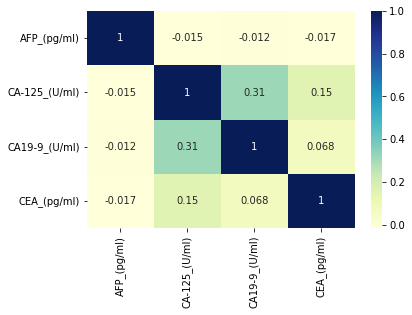

In [39]:
table.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(table.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mlt.show()

# END